### UFO SIGHTING DATASET

## Describe the dataset using a built-in function. – 5% marks.

To complete this task we did the following:

1. Read in the file using the read_csv function
2. Printed the first few rows of our data using the .head() function
3. Printed a description of the dataset using the .describe()
4. Got info on our dataset using the info() function


In [1]:
#Installed the pandas library using 'pip install pandas'
# Importing the pandas library
import pandas as pd

# Reading in the dataset 
ufo_dataset = pd.read_csv('ufo-sightings-1.csv')

# Using the built in function to describe the dataset

# First few rows of the data
print('')
print('First few rows of dataset')
print('############################')
print(ufo_dataset.head())

# Summary of the data
print('')
print('Dataset Description')
print('############################')
print(ufo_dataset.describe())

# Get info on the dataset using info
print('')
print('Dataset Information')
print('############################')
print(ufo_dataset.info())


First few rows of dataset
############################
   Unnamed: 0            Date_time date_documented    Year  Month  Hour  \
0           0  1949-10-10 20:30:00       4/27/2004  1949.0   10.0  20.0   
1           1  1949-10-10 21:00:00      12/16/2005  1949.0   10.0  21.0   
2           2  1955-10-10 17:00:00       1/21/2008  1955.0   10.0  17.0   
3           3  1956-10-10 21:00:00       1/17/2004  1956.0   10.0  21.0   
4           4  1960-10-10 20:00:00       1/22/2004  1960.0   10.0  20.0   

   Season Country_Code         Country   Region        Locale   latitude  \
0  Autumn          USA   United States    Texas    San Marcos  29.883056   
1  Autumn          USA   United States    Texas  Bexar County  29.384210   
2  Autumn          GBR  United Kingdom  England       Chester  53.200000   
3  Autumn          USA   United States    Texas          Edna  28.978333   
4  Autumn          NaN   United States   Hawaii       Kaneohe  21.418056   

   longitude UFO_shape  length_of_en

### 2- Filter the dataset to deal with data cells containing NaN (Not a number, null values). –5% marks.

In [3]:
# We are going to write code that identifes columns that have NA's and how many
# As a group we will decide what we will do with this information
# We can either impute the values with the mode (categoric) or the median (numeric)

missing_values_in_dataset = ufo_dataset.isna().sum()

# Printing out the missing values variable which will output columns and how many NA's
print(missing_values_in_dataset)

Unnamed: 0                        0
Date_time                       796
date_documented                 798
Year                            794
Month                           799
Hour                            799
Season                          793
Country_Code                   1053
Country                        1048
Region                         1356
Locale                         1249
latitude                        798
longitude                       793
UFO_shape                      2709
length_of_encounter_seconds     796
Encounter_Duration              798
Description                     814
dtype: int64


MORE EDA

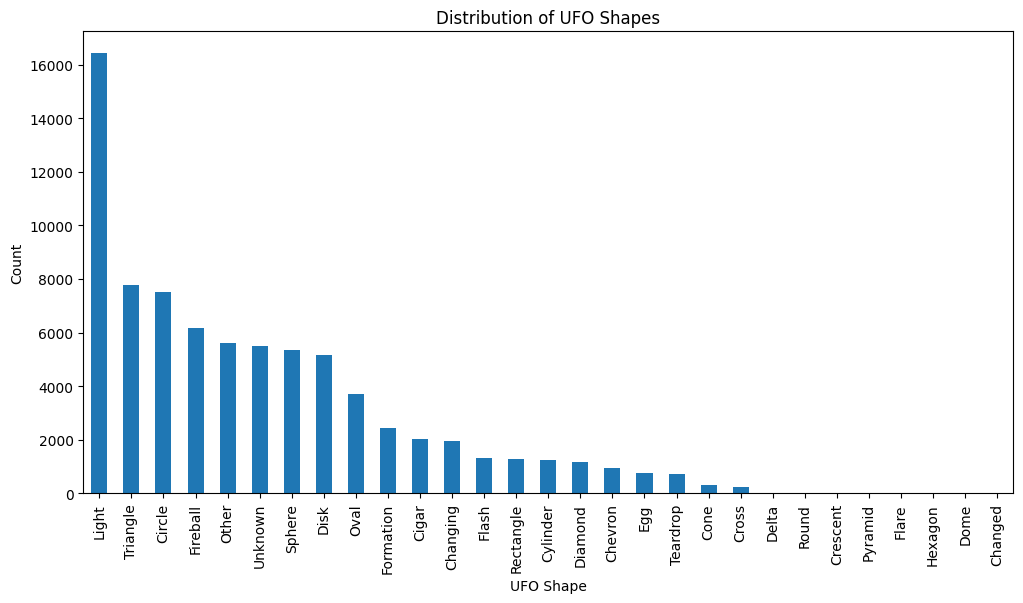

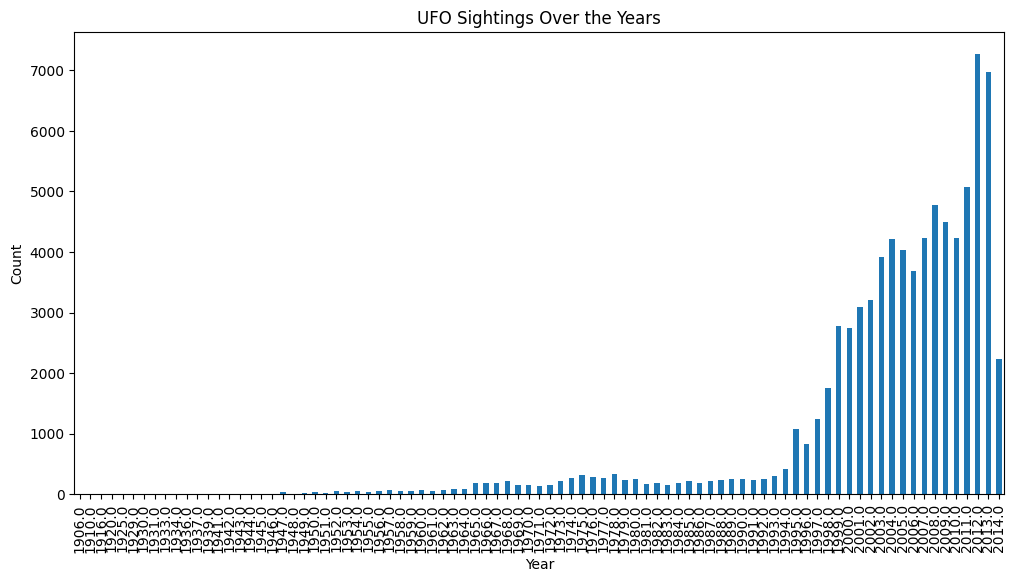

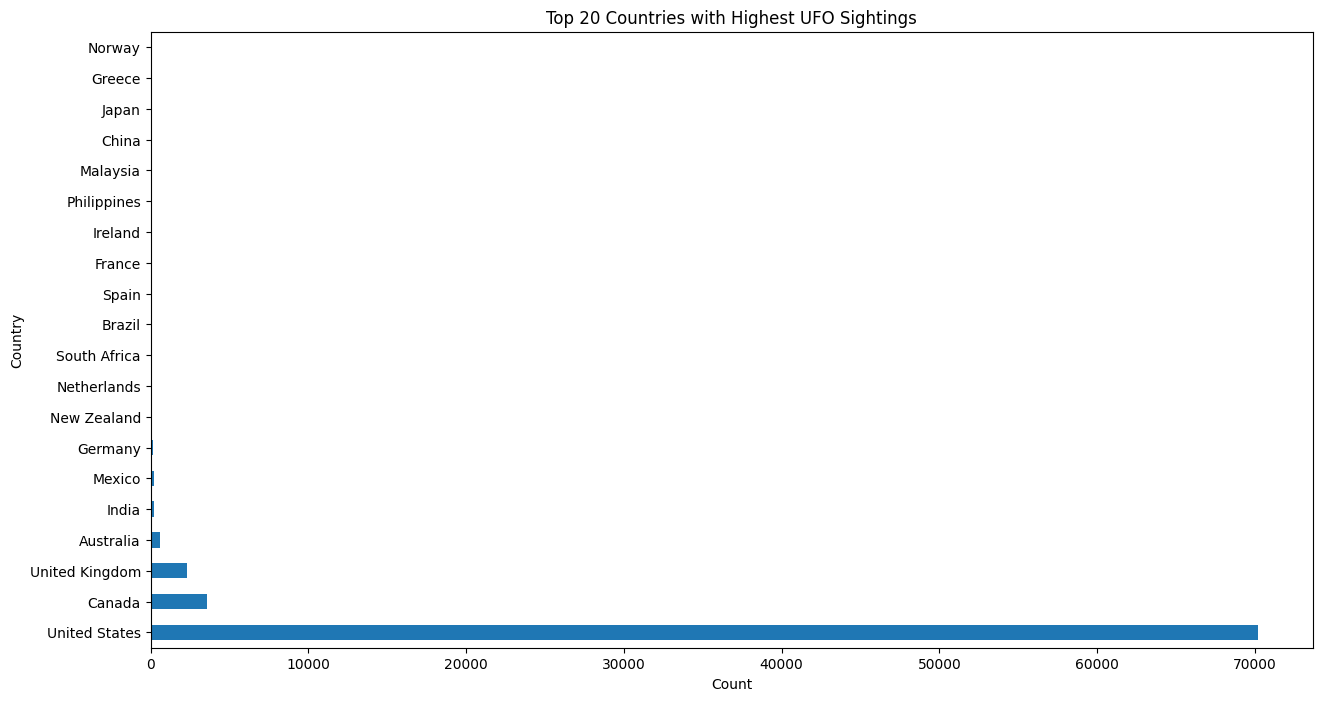

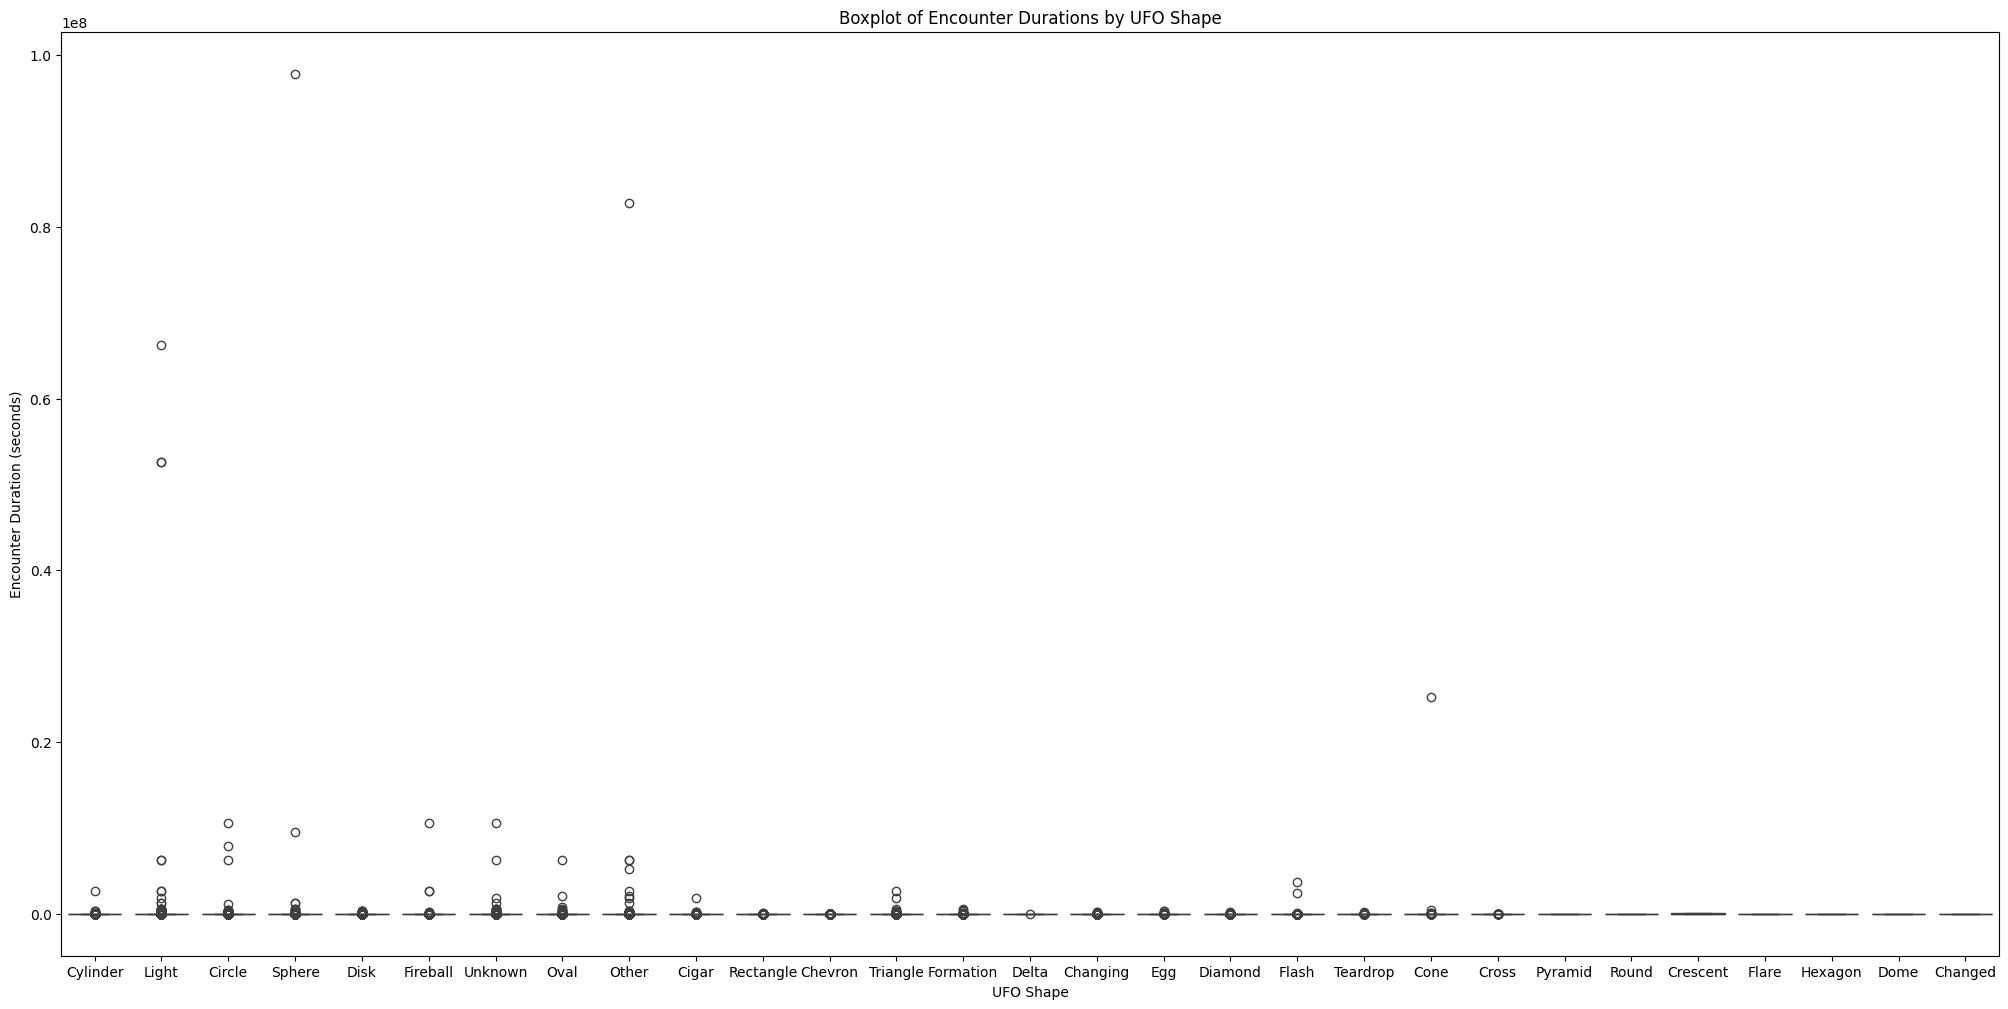

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the distribution of UFO shapes
plt.figure(figsize=(12, 6))
ufo_dataset['UFO_shape'].value_counts().plot(kind='bar')
plt.title('Distribution of UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.show()

# Visualizing sightings over the years
plt.figure(figsize=(12, 6))
ufo_dataset['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('UFO Sightings Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Visualizing sightings by country
plt.figure(figsize=(15, 8))
ufo_dataset['Country'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Countries with Highest UFO Sightings')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Adding boxplot for the 'length_of_encounter_seconds' column
plt.figure(figsize=(25, 12))
sns.boxplot(x='UFO_shape', y='length_of_encounter_seconds', data=ufo_dataset)
plt.title('Boxplot of Encounter Durations by UFO Shape')
plt.xlabel('UFO Shape')
plt.ylabel('Encounter Duration (seconds)')
plt.show()



In [8]:
# We can either remove these columns entirely or try different approaches
# we are just going to replace categoric with the mode, and numeric with the mean for now

# Creating a copy of the dataset so the original ins't modified 
imputed_ufo_dataset = ufo_dataset.copy()

# Imputing the numeric columns with the median
for column in imputed_ufo_dataset.select_dtypes(include=['float64','int64']).columns:
    imputed_ufo_dataset[column].fillna(imputed_ufo_dataset[column].median(), inplace=True)

# Imputing the categorical columns with the mode
for column in imputed_ufo_dataset.select_dtypes(include=['object']).columns:
    imputed_ufo_dataset[column].fillna(imputed_ufo_dataset[column].mode()[0], inplace=True)


# Running previous code to check for empty columns on imputed dataset
missing_values_in_imputed_dataset = imputed_ufo_dataset.isna().sum()

# Printing out the missing values variable which will output columns and how many NA's
print(missing_values_in_imputed_dataset)



Unnamed: 0                     0
Date_time                      0
date_documented                0
Year                           0
Month                          0
Hour                           0
Season                         0
Country_Code                   0
Country                        0
Region                         0
Locale                         0
latitude                       0
longitude                      0
UFO_shape                      0
length_of_encounter_seconds    0
Encounter_Duration             0
Description                    0
dtype: int64


###  Plot the encounters in a worldmap using Plotly (Use the latitude and longitude) – 10%

In [9]:
print(imputed_ufo_dataset[['latitude', 'longitude']].head())

    latitude  longitude
0  29.883056 -97.941111
1  29.384210 -98.581082
2  53.200000  -2.916667
3  28.978333 -96.645833
4  21.418056 -87.903333


In [10]:
#Installed the plotly library using 'pip install plotly'
# Used: https://plotly.com/python/maps/
# Used: https://plotly.com/python/getting-started/

# Importing the plotly library 

import plotly.express as px


# Plotting the encounters on the world map
fig_worldmap = px.scatter_geo(imputed_ufo_dataset, lat='latitude', lon='longitude',hover_name='Locale',symbol='UFO_shape'
                     )
# Customizing the layout
fig_worldmap.update_geos(projection_type="natural earth") 
fig_worldmap.update_layout(title_text='UFO sightings worldwide')
# Showing the plot
fig_worldmap.show()

 Investigate how longest encounters per country. How long where them? Which 
country had the longest encounter? What was the UFO shape?. – 10% markss

In [7]:
# Assuming imputed_ufo_dataset is your cleaned and imputed dataset
# Making sure that 'length_of_encounter_seconds' is numeric 
imputed_ufo_dataset['length_of_encounter_seconds'] = pd.to_numeric(imputed_ufo_dataset['length_of_encounter_seconds'], errors='coerce')

# Creating a variable that groups by country and finds the row with the max duration of encounters per group
longest_encounters = imputed_ufo_dataset.loc[imputed_ufo_dataset.groupby('Country')['length_of_encounter_seconds'].idxmax()]

# Displaying the results for each country
longest_encounters_per_country = longest_encounters[['Country', 'length_of_encounter_seconds', 'UFO_shape']]

# Finding the country with the longest encounter
country_with_longest_encounter = longest_encounters.loc[longest_encounters['length_of_encounter_seconds'].idxmax()]

# Getting details of the longest encounter overall
longest_encounter_overall = country_with_longest_encounter[['Country', 'length_of_encounter_seconds', 'UFO_shape']]

# Printing out the results
print("Longest Encounters per Country:")
print(longest_encounters_per_country)
print("\nCountry with the Longest Encounter:")
print(longest_encounter_overall)


Longest Encounters per Country:
           Country  length_of_encounter_seconds UFO_shape
13690  Afghanistan                       1200.0     Light
38241      Albania                        120.0     Light
6185       Algeria                         60.0     Light
60728    Argentina                      86400.0      Oval
34882      Armenia                        600.0    Circle
...            ...                          ...       ...
45627   Uzbekistan                       6900.0    Sphere
78059    Venezuela                       3600.0     Light
63215      Vietnam                      10800.0    Sphere
45784       Zambia                        240.0  Fireball
68365     Zimbabwe                       2700.0     Light

[151 rows x 3 columns]

Country with the Longest Encounter:
Country                        United Kingdom
length_of_encounter_seconds        97836000.0
UFO_shape                              Sphere
Name: 559, dtype: object


 Investigate the trend between UFO shapes and year. – 10% marks

In [9]:
# Grouping the data by the year and UFO_shape and counting occurrences
ufo_shape_trends = imputed_ufo_dataset.groupby(['Year', 'UFO_shape']).size().reset_index(name='Counts')

# Creating an interactive line plot with hover information
fig_shape_trend = px.line(ufo_shape_trends, x='Year', y='Counts', color='UFO_shape',
              labels={'Counts': 'Number of Sightings'},
              title='UFO Shape Sightings by Year',
              )

# Adding hover information for the UFO shape using legendgroup attribute
fig_shape_trend.update_traces(mode='lines+markers',
                  hovertemplate='<b>%{y} Sightings</b><br>Year: %{x}')

# Customizing the layout
fig_shape_trend.update_layout(xaxis_title='Year', yaxis_title='Number of Sightings', legend_title='UFO Shape')

# Showing the plot
fig_shape_trend.show()


# Q6

In [11]:
#Installed the pycountry library using 'pip install plotly'
#Installed the pycountry_convert library using 'pip install pycountry-convert'
import pycountry
import pycountry_convert as pc

# Function to get continent code from country name
def get_continent_from_country(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        if country:
            continent_code = pc.country_alpha2_to_continent_code(country.alpha_2)
            return continent_code
        return None
    except:
        return None

# Function to classify as American, European, or Other
def classify_region(continent_code):
    if continent_code in ['NA', 'SA']:
        return 'Americas'
    elif continent_code == 'EU':
        return 'Europe'
    else:
        return 'Other'

# Apply the functions
ufo_dataset['Continent'] = ufo_dataset['Country'].apply(get_continent_from_country)
ufo_dataset['Region'] = ufo_dataset['Continent'].apply(classify_region)

# Print a few rows to verify the new columns
print(ufo_dataset.head())
print(ufo_dataset[['Country', 'Region']].head(50)) 

   Unnamed: 0            Date_time date_documented    Year  Month  Hour  \
0           0  1949-10-10 20:30:00       4/27/2004  1949.0   10.0  20.0   
1           1  1949-10-10 21:00:00      12/16/2005  1949.0   10.0  21.0   
2           2  1955-10-10 17:00:00       1/21/2008  1955.0   10.0  17.0   
3           3  1956-10-10 21:00:00       1/17/2004  1956.0   10.0  21.0   
4           4  1960-10-10 20:00:00       1/22/2004  1960.0   10.0  20.0   

   Season Country_Code         Country    Region        Locale   latitude  \
0  Autumn          USA   United States  Americas    San Marcos  29.883056   
1  Autumn          USA   United States  Americas  Bexar County  29.384210   
2  Autumn          GBR  United Kingdom    Europe       Chester  53.200000   
3  Autumn          USA   United States  Americas          Edna  28.978333   
4  Autumn          NaN   United States  Americas       Kaneohe  21.418056   

   longitude UFO_shape  length_of_encounter_seconds Encounter_Duration  \
0 -97.941111

In [12]:
# Assuming you've already loaded the dataset into ufo_dataset

# Function to define seasons in the Northern Hemisphere
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a season column
ufo_dataset['Season'] = ufo_dataset['Month'].apply(get_season)

# Group by region and season and count sightings
seasonal_sightings = ufo_dataset.groupby(['Region', 'Season']).size().reset_index(name='Count')

# Analyze the results
print(seasonal_sightings)

      Region  Season  Count
0   Americas  Autumn  20123
1   Americas  Spring  14759
2   Americas  Summer  24149
3   Americas  Winter  15191
4     Europe  Autumn    748
5     Europe  Spring    683
6     Europe  Summer   1124
7     Europe  Winter    694
8      Other  Autumn    628
9      Other  Spring    672
10     Other  Summer    794
11     Other  Winter    763


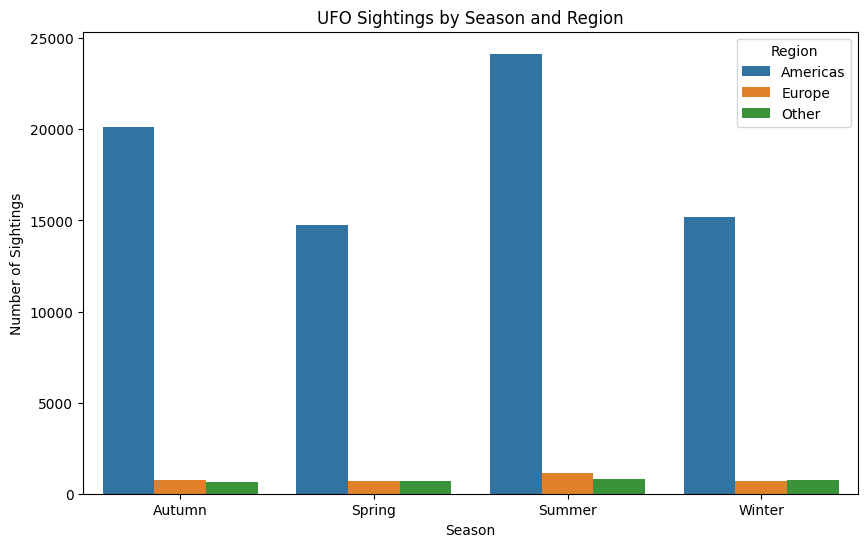

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you've run the previous code to get seasonal_sightings

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Count', hue='Region', data=seasonal_sightings)

# Adding titles and labels for clarity
plt.title('UFO Sightings by Season and Region')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.legend(title='Region')

# Show the plot
plt.show()

# Q7 Hypothesis Test

**Hypothesis** There are significantly more UFO sightings during the night (defined as 8 PM to 6 AM) than during the day (6 AM to 8 PM).

**Data Preparation:** Extract the hour from the 'Date_time' column and categorize sightings as 'Day' or 'Night' based on the defined time range.

In [18]:

# Already loaded in the dataset

ufo_dataset['Date_time'] = pd.to_datetime(ufo_dataset['Date_time'], errors='coerce')
ufo_dataset['Hour'] = ufo_dataset['Date_time'].dt.hour

# Defining day and night times
ufo_dataset['Time_of_day'] = 'Day'
ufo_dataset.loc[(ufo_dataset['Hour'] >= 20) | (ufo_dataset['Hour'] <= 6),'Time_of_day'] = 'Night'

# Counting the number of UFO's seen during the day and during the night
ufo_sightings = ufo_dataset['Time_of_day'].value_counts()

# print results
print(ufo_sightings)

Time_of_day
Night    55036
Day      25292
Name: count, dtype: int64


**Number of sightings**
Time_of_day

Nigh    5503
6
Day      252
92
Name: count, dtype: int64



**Statistical Test:** Perform a chi-squared test to see if there is a significant difference in the number of sightings between day and night.

In [26]:
from scipy.stats import chi2_contingency

# Total sightings
total_sightings = 55036 + 25292

# Expected sightings if there's no preference for day or night
expected_night = total_sightings / 2
expected_day = total_sightings / 2

# Observed counts
observed_counts = [55036, 25292]  # [Night, Day]
expected_counts = [expected_night, expected_day]

# Chi-squared test
chi2, p_value, dof, expected = chi2_contingency([observed_counts, expected_counts])

# Print the p-value
print("Chi-Squared Test p-value:", p_value)




Chi-Squared Test p-value: 0.0


**Interpret the Result:** Based on the p-value from the chi-squared test, decide whether to reject or fail to reject the null hypothesis.

In [30]:
# Interpret the p-value 
significance_level = 0.5
if p_value < significance_level:
    print('Reject the null hypothesis, there is a significant difference in UFO sightings between day and night time.')
else:
    print('Fail to reject the null hypothesis, there is no significant difference in UFO sightings between day and night time')

print(f'p-value obtained is {p_value}')

Reject the null hypothesis, there is a significant difference in UFO sightings between day and night time.
p-value obtained is 0.0


**Interpretation of the Result**

**Statistical Significance** We got a  p-value of 0.0 (or a very small number close to zero) which means that the difference in sighting counts between day and night is extremely unlikely to have occurred by chance. we can see this from our UFO sightings count earlier in our analysis.
Night 55036 Day 25292

**Reject the Null Hypothesis** From this result we can reject the null hypothesis, which tells us that there is no significant difference in UFO sightings between day and night. as we now know the opposite to be the case

**Implication** The p-value we got would suggest that UFO sightings are more frequent at night compared to during the day.